Zadanie 1

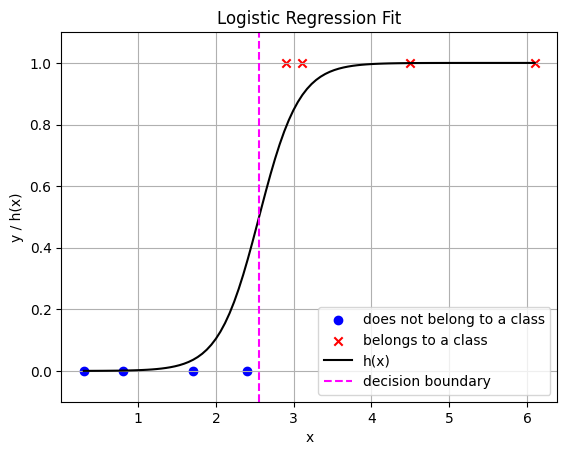

In [191]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt

def h_fun(X, theta):
    z = theta.T @ X
    h = 1.0 / (1.0 + np.exp(-z))
    return h

def calculate_cost(X, y, theta):
    h = h_fun(X, theta)
    y_1 = -y * np.log(h)
    y_0 = -(1 - y) * np.log(1 - h)
    return (y_1 + y_0).sum() / X.shape[1]

x = np.array([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
              [0.3, 0.8, 1.7, 2.4, 2.9, 3.1, 4.5, 6.1]])
y = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]])


X = x
theta = np.array([[0],[0]])

alpha = 0.1       
eps = 1e-5         
previous_cost = float('inf')

for i in range(10000):  
    h = h_fun(X, theta)
    error = h - y
    gradient = (X @ error.T) / X.shape[1]
    theta = theta - alpha * gradient

    cost = calculate_cost(X, y, theta)
    if abs(previous_cost - cost) < eps:
        break
    previous_cost = cost

x_values = X[1, :]  


plt.scatter(x_values[y[0] == 0], y[0][y[0] == 0], color='blue', label='does not belong to a class', marker='o')
plt.scatter(x_values[y[0] == 1], y[0][y[0] == 1], color='red', label='belongs to a class', marker='x')

x_plot = np.linspace(x_values.min(), x_values.max(), 100)
X_plot = np.vstack([np.ones(x_plot.shape), x_plot])
h_plot = h_fun(X_plot, theta)
plt.plot(x_plot, h_plot.flatten(), color='black', label='h(x)')


if theta[1, 0] != 0:
    decision_boundary = -theta[0, 0] / theta[1, 0]
    plt.axvline(decision_boundary, color='magenta', linestyle='--', label='decision boundary')


plt.xlabel('x')
plt.ylabel('y / h(x)')
plt.title('Logistic Regression Fit')
plt.legend()
plt.grid(True)
plt.ylim(-0.1, 1.1)
plt.show()


Zadanie 2

C:\Users\barto\AppData\Local\Temp\ipykernel_25072\2259496089.py:14: RuntimeWarning: divide by zero encountered in log
  y_0 = -(1 - y) * np.log(1 - h)
C:\Users\barto\AppData\Local\Temp\ipykernel_25072\2259496089.py:14: RuntimeWarning: invalid value encountered in multiply
  y_0 = -(1 - y) * np.log(1 - h)


Wagi (theta):
 [[-24.35816144]
 [  0.20627883]
 [  0.19099174]]


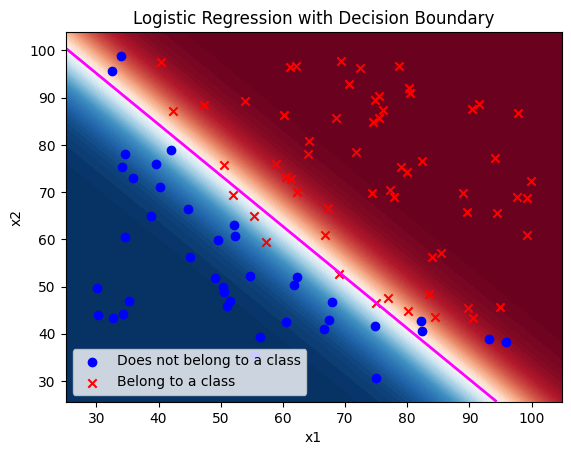

In [192]:
with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T       # (1, m)
    x1 = data[:, :1].T       # (1, m)
    x2 = data[:, 1:2].T      # (1, m)
    X = np.concatenate([np.ones([1, x1.shape[1]]), x1, x2])  # (3, m)


theta = np.zeros((3, 1))
alpha = 0.0065
eps = 1e-5
previous_cost = float('inf')

for i in range(100000):
    h = h_fun(X, theta)
    error = h - y
    gradient = (X @ error.T) / X.shape[1]
    theta = theta - alpha * gradient

    cost = calculate_cost(X, y, theta)
    if abs(previous_cost - cost) < eps:
        break
    previous_cost = cost

print("Wagi (theta):\n", theta)


x1_min, x1_max = x1.min(), x1.max()
x2_min, x2_max = x2.min(), x2.max()

x1_vals = np.linspace(x1_min - 5, x1_max + 5, 200)
x2_vals = np.linspace(x2_min - 5, x2_max + 5, 200)

xx1, xx2 = np.meshgrid(x1_vals, x2_vals)

grid = np.c_[np.ones(xx1.ravel().shape), xx1.ravel(), xx2.ravel()].T
probs = h_fun(grid, theta).reshape(xx1.shape)


plt.contourf(xx1, xx2, probs, levels=100, cmap='RdBu_r', alpha=1)


plt.scatter(x1[0, y[0] == 0], x2[0, y[0] == 0], color='blue', label='Does not belong to a class', marker='o')
plt.scatter(x1[0, y[0] == 1], x2[0, y[0] == 1], color='red', label='Belong to a class', marker='x')

i
plt.contour(xx1, xx2, probs, levels=[0.5], colors='magenta', linewidths=2)

# Podpisy
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Logistic Regression with Decision Boundary")
plt.show()

Zadanie 3

Wagi (theta):
 [[-22.54675481]
 [ 64.01461425]
 [ 20.69693447]
 [-44.00056493]]


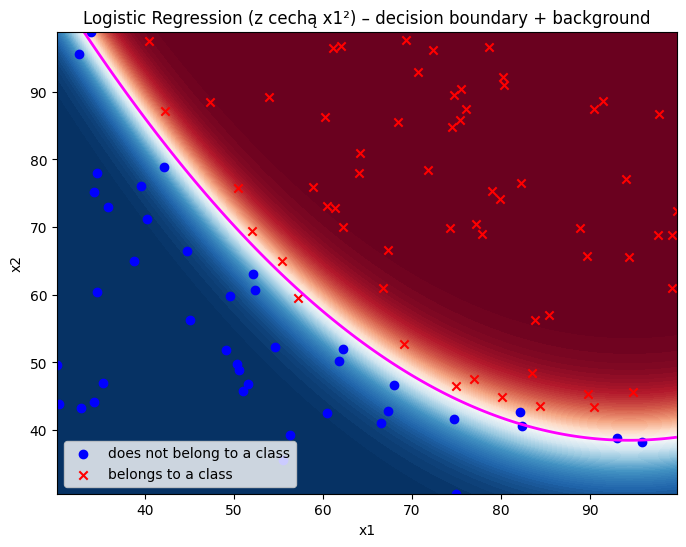

In [193]:
with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T       
    x1 = data[:, :1].T       
    x2 = data[:, 1:2].T     
    X = np.concatenate([np.ones([1, x1.shape[1]]), x1, x2, x1**2])  # (4, m)

X_max = X.max(axis=1, keepdims=True)
X_min = X.min(axis=1, keepdims=True)
X_min[0, 0] = 0  
X = (X - X_min) / (X_max - X_min)

theta = np.zeros((4, 1))  
alpha = 22
eps = 1e-5
previous_cost = float('inf')

for i in range(10000):
    h = h_fun(X, theta)
    error = h - y
    gradient = (X @ error.T) / X.shape[1]
    theta = theta - alpha * gradient

    cost = calculate_cost(X, y, theta)
    if abs(previous_cost - cost) < eps:
             break
    previous_cost = cost

print("Wagi (theta):\n", theta)

plt.figure(figsize=(8,6))

x1_vals = np.linspace(x1.min(), x1.max(), 200)
x2_vals = np.linspace(x2.min(), x2.max(), 200)
xx1, xx2 = np.meshgrid(x1_vals, x2_vals)

xx1_flat = xx1.ravel()
xx2_flat = xx2.ravel()
xx1_sq_flat = xx1_flat ** 2

xx_bias = np.ones_like(xx1_flat)
X_grid = np.vstack([xx_bias, xx1_flat, xx2_flat, xx1_sq_flat])
X_grid = (X_grid - X_min) / (X_max - X_min)
X_grid[0, :] = 1  

probs = h_fun(X_grid, theta).reshape(xx1.shape)

plt.contourf(xx1, xx2, probs, levels=100, cmap='RdBu_r', alpha=1)

plt.scatter(x1[0, y[0]==0], x2[0, y[0]==0], color='blue', label='does not belong to a class', marker='o')
plt.scatter(x1[0, y[0]==1], x2[0, y[0]==1], color='red', label='belongs to a class', marker='x')

plt.contour(xx1, xx2, probs, levels=[0.5], colors='magenta', linewidths=2)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Logistic Regression (z cechą x1²) – decision boundary + background')
plt.legend()
plt.show()

Zadanie 4

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import math

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# Załaduj dane
data = datasets.load_digits()
X = data['data']       
y = data['target']      


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234)


print(f"{X_train.shape=}, {y_train.shape=}")


x_scale = 16.0
X_train = (X_train / x_scale).T   # (64, m)
X_test = (X_test / x_scale).T     # (64, m)
m_train = X_train.shape[1]

theta_list = []
eps = 1e-5
alpha = 1e-1
no_of_cls = 10
n = X_train.shape[0]

for cls_id in range(no_of_cls):
    print(f"\n Uczenie modelu dla klasy {cls_id}...")
    
    y_cls = (y_train == cls_id).astype(np.int8).reshape(1, m_train)
    X_cls = np.concatenate([np.ones((1, m_train)), X_train])  
    
    theta_cls = np.zeros((n+1, 1))
    prev_cost = calculate_cost(X_cls, y_cls, theta_cls)
    
    while True:
        h = h_fun(X_cls, theta_cls)
        error = h - y_cls
        gradient = X_cls @ error.T / m_train
        theta_cls -= alpha * gradient

        current_cost = calculate_cost(X_cls, y_cls, theta_cls)
        if abs(prev_cost - current_cost) < eps:
            break
        prev_cost = current_cost

    theta_list.append(theta_cls)


m_test = X_test.shape[1]
no_of_cls = 10

y_pred = []


for i in range(m_test):
    probs = np.zeros(no_of_cls)
    x_i = X_test[:, i].reshape(-1, 1)  
    x_i = np.vstack([np.ones((1, 1)), x_i])  

    for cls_id in range(no_of_cls):
        theta_cls = theta_list[cls_id]
        probs[cls_id] = sigmoid(theta_cls.T @ x_i)

    y_pred.append(np.argmax(probs))

y_pred = np.array(y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=2)

print("Macierz konfuzji:")
print(conf_matrix)

print("\nRaport klasyfikacyjny:")
print(report)


X_train.shape=(1347, 64), y_train.shape=(1347,)

 Uczenie modelu dla klasy 0...

 Uczenie modelu dla klasy 1...

 Uczenie modelu dla klasy 2...

 Uczenie modelu dla klasy 3...

 Uczenie modelu dla klasy 4...

 Uczenie modelu dla klasy 5...

 Uczenie modelu dla klasy 6...

 Uczenie modelu dla klasy 7...

 Uczenie modelu dla klasy 8...

 Uczenie modelu dla klasy 9...
Macierz konfuzji:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  0  0  0  1  0  0  2]
 [ 0  1 47  0  0  0  0  1  0  0]
 [ 0  0  0 43  0  1  0  0  0  0]
 [ 1  0  0  0 48  0  0  2  1  0]
 [ 0  0  0  0  1 46  1  0  0  1]
 [ 0  1  0  0  0  0 43  0  1  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  3  1  0  0  0  1  0 37  1]
 [ 0  0  0  0  0  0  0  2  3 39]]

Raport klasyfikacyjny:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.90      0.94      0.92        47
           2       0.98      0.96      0.97        49
           3       1.00      0.98      0.9

C:\Users\barto\AppData\Local\Temp\ipykernel_25072\1390540602.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  probs[cls_id] = sigmoid(theta_cls.T @ x_i)


Zadanie 5

In [195]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from scipy.ndimage import sobel


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def h_fun(X, theta):
    return sigmoid(theta.T @ X)

def calculate_cost(X, y, theta):
    m = y.shape[1]
    h = h_fun(X, theta)
    return -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

def extract_custom_features(X_raw):
    features = []
    for img in X_raw:
        img_2d = img.reshape(8, 8)
        mean_brightness = np.mean(img_2d)
        bright_pixels = np.sum(img_2d > 5)
        contrast = np.max(img_2d) - np.min(img_2d)
        sobel_x = sobel(img_2d, axis=0, mode='constant')
        sobel_y = sobel(img_2d, axis=1, mode='constant')
        edge_strength = np.mean(np.abs(sobel_x) + np.abs(sobel_y))
        features.append([mean_brightness, bright_pixels, contrast, edge_strength])
    return np.array(features)


data = datasets.load_digits()
X_raw = data['data']
y = data['target']

X_custom = extract_custom_features(X_raw)
X_train_c, X_test_c, y_train, y_test = train_test_split(X_custom, y, random_state=1234)


X_train = X_train_c.T
X_test = X_test_c.T
m_train = X_train.shape[1]
m_test = X_test.shape[1]
n = X_train.shape[0]


theta_list = []
alpha = 0.1
eps = 1e-5
no_of_cls = 10

for cls_id in range(no_of_cls):
    y_cls = (y_train == cls_id).astype(int).reshape(1, m_train)
    X_cls = np.concatenate([np.ones((1, m_train)), X_train])  
    theta = np.zeros((n + 1, 1))
    prev_cost = calculate_cost(X_cls, y_cls, theta)
    
    while True:
        h = h_fun(X_cls, theta)
        error = h - y_cls
        grad = X_cls @ error.T / m_train
        theta -= alpha * grad

        cost = calculate_cost(X_cls, y_cls, theta)
        if abs(prev_cost - cost) < eps:
            break
        prev_cost = cost

    theta_list.append(theta)


y_pred = []

for i in range(m_test):
    probs = np.zeros(no_of_cls)
    x_i = X_test[:, i].reshape(-1, 1)
    x_i = np.vstack([np.ones((1, 1)), x_i])
    for cls_id in range(no_of_cls):
        probs[cls_id] = sigmoid(theta_list[cls_id].T @ x_i)
    y_pred.append(np.argmax(probs))

y_pred = np.array(y_pred)


print("Macierz konfuzji:")
print(confusion_matrix(y_test, y_pred))

print("\nRaport klasyfikacyjny:")
print(classification_report(y_test, y_pred, digits=2))

print("Dokładność ogólna:", accuracy_score(y_test, y_pred))


C:\Users\barto\AppData\Local\Temp\ipykernel_25072\744713767.py:17: RuntimeWarning: divide by zero encountered in log
  return -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
C:\Users\barto\AppData\Local\Temp\ipykernel_25072\744713767.py:17: RuntimeWarning: invalid value encountered in multiply
  return -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))


Macierz konfuzji:
[[19  2  3  4  2  3  0  3  0  1]
 [ 0 13  6  6  2  2  4  9  0  5]
 [ 8  2 15 10  2  4  4  2  1  1]
 [ 5  3 10 11  1  1  4  2  0  7]
 [ 9  6  8  9  4  4  1  6  0  5]
 [ 3  6  7  9  4  5  4  4  0  7]
 [ 1  7 10  9  0  2  6  1  1  8]
 [ 5  3  5 10  2  4  1  4  0  6]
 [ 0  7  0  1  0  0  2  0 20 13]
 [ 0  8  4  9  1  0  4  3  1 14]]

Raport klasyfikacyjny:
              precision    recall  f1-score   support

           0       0.38      0.51      0.44        37
           1       0.23      0.28      0.25        47
           2       0.22      0.31      0.26        49
           3       0.14      0.25      0.18        44
           4       0.22      0.08      0.11        52
           5       0.20      0.10      0.14        49
           6       0.20      0.13      0.16        45
           7       0.12      0.10      0.11        40
           8       0.87      0.47      0.61        43
           9       0.21      0.32      0.25        44

    accuracy                   

C:\Users\barto\AppData\Local\Temp\ipykernel_25072\744713767.py:80: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  probs[cls_id] = sigmoid(theta_list[cls_id].T @ x_i)
